In [1]:
from quilt.data.MarcelColvin import photos
import pandas as pd
import shapely.geometry as geom
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline

In [63]:
pics = gpd.read_file("Picture_coords/pic_coords.shp")
fields = gpd.read_file("fields_corrected/fields_corrected.shp")

In [64]:
for i in range(0,len(fields)):
    if(fields['crop_list'][i] == None):
        fields['crop_list'][i] = 'UNKNOWN'

C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
field1 = pics["geometry"][0]

In [66]:
def container(x):
    """This function applies the contain function which 
    determins if the coordinates of crop field are in a photo
    """
    return(field1.intersects(x))
nvdicrops = fields[fields['geometry'].apply(container)]

In [67]:
nvdicrops['coords'] = nvdicrops['geometry'].apply(lambda x: x.representative_point().coords[:])
nvdicrops['coords'] = [coords[0] for coords in nvdicrops['coords']]

C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [68]:
colors = ['xkcd:purple','xkcd:green','xkcd:blue','xkcd:pink','xkcd:brown','xkcd:red',
          'xkcd:light blue','xkcd:teal','xkcd:orange','xkcd:light green','xkcd:magenta',
          'xkcd:yellow','xkcd:sky blue','xkcd:grey','xkcd:lime green','xkcd:olive']

In [69]:
crops = nvdicrops['crop_list'].unique()

In [87]:
fields

,OBJECTID,county_num,pk_site_id,site_id,pk_permit_,permit_num,permittee,permit_yr,p_eff_date,p_exp_date,...,loc_narr,is_active,size,size_units,crop_list,calc_acres,mtrs,hq_distric,site_distr,geometry
0,2771691,57,6129265,A14,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,WILLOWPOINT RD,1,15.00,ACRES,"OAT FOR/FOD, UNCULTIVATED AG",8.920299,M07N04E28,57,None,POLYGON ((-121.5435143790129 38.43134714591933...
1,3617440,57,6129266,B10,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,JEFFERSON BLVD,1,90.00,ACRES,ALFALFA,92.088548,M07N03E24,57,57,POLYGON ((-121.5829806146166 38.43535362263977...
2,2772757,57,6129267,B11,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,JEFFERSON X WILLOWPOINT,1,75.00,ACRES,ALFALFA,77.539027,M07N03E24,57,57,POLYGON ((-121.5897884711797 38.43475678825893...
3,2770898,57,6129268,B12,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,WILLOWPOINT @ DEEP WATER CHANNEL,1,75.00,ACRES,"OAT FOR/FOD, UNCULTIVATED AG",60.747020,M07N03E24,57,57,POLYGON ((-121.5948226102154 38.44296931203907...
4,2770899,57,6129269,B13,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,WILLOWPOINT X Z-LINE,1,64.00,ACRES,"OAT FOR/FOD, UNCULTIVATED AG",63.385837,M07N03E24,57,57,"POLYGON ((-121.5933455142271 38.4409508416019,..."
5,2771489,57,6129270,B14,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,FIELD NORTH OF B15,1,54.00,ACRES,ALFALFA,54.034062,M07N03E24,57,57,POLYGON ((-121.5918825640575 38.43821315794216...
6,2770078,57,6129271,B15,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,WILLOWPOINT ROAD,1,43.00,ACRES,ALFALFA,46.672966,M07N03E24,57,57,POLYGON ((-121.5881540782541 38.43167761245395...
7,2771692,57,6129272,B16,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,LAMB,1,40.00,ACRES,ALFALFA,44.585527,M07N03E25,57,57,POLYGON ((-121.5919948516327 38.42925025223892...
8,2770079,57,6129273,B17,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,Z-LINE ROAD,1,56.00,ACRES,ALFALFA,59.400268,M07N03E25,57,57,POLYGON ((-121.5977750579594 38.42562607534814...
9,2770462,57,6129274,B3,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,1/4 MILE WEST OF JEFFERSON @ DEEP WATER CHANNEL,1,30.00,ACRES,ALFALFA,28.628593,M07N03E13,57,57,POLYGON ((-121.5874748341517 38.45818404892704...


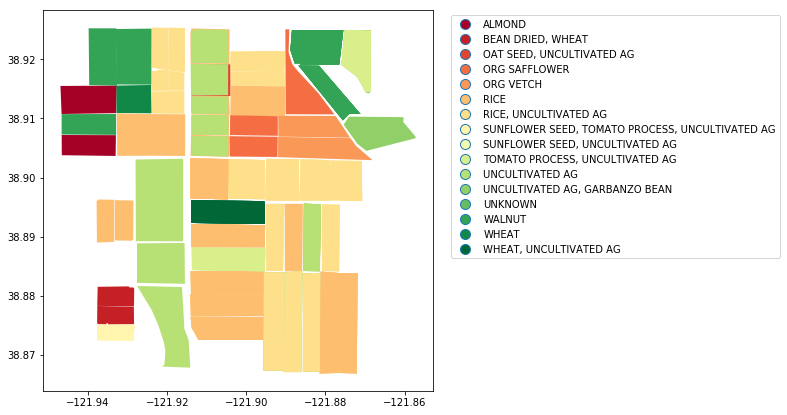

In [96]:
import matplotlib.axis
fig, ax = plt.subplots(1, figsize=(7,7))
nvdicrops.plot(ax = ax,column = 'crop_list',cmap = 'RdYlGn', legend = True)
l=ax.get_legend()
l.set_bbox_to_anchor((1, 1, .9, 0))


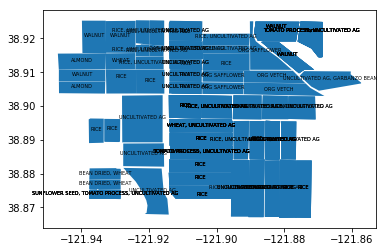

In [24]:
nvdicrops.plot()
for idx,row in nvdicrops.iterrows():
    plt.annotate(s=row['crop_list'],xy = row['coords'],
                 horizontalalignment='center',fontsize = 5)
